# Scrambling an image of a bee

In this notebook we read in the image of a bee, display it. Then we draw random indices for each 2D level (a JPEG image is a $N_x \times N_y \times 3$ array with the last dimension giving R, G and B). Finally we use this to scramble the 2D information

In [16]:
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

## Reading in and displaying

I use the [https://pillow.readthedocs.io/en/stable/index.html](pillow) python library to read in images. You can install this using `pip pillow`

In [17]:
foto = Image.open('bee in the rosemary.jpg')

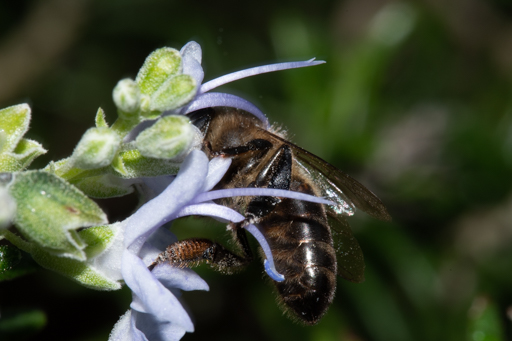

In [18]:
display(foto)

In [19]:
foto.size

(512, 341)

In [20]:
d = np.asarray(foto)

In [21]:
nx, ny, nz = d.shape

In [22]:
d_scrambled = d.copy()

In [23]:
ii = np.random.uniform(size=(nx*ny))

In [24]:
i_sort = np.argsort(ii)

In [25]:
slice_im = d[:, :, 0].copy().flatten()
slice_im.shape

(174592,)

In [26]:
slice_im[i_sort].shape

(174592,)

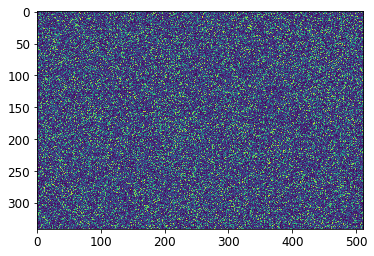

In [27]:
slice2D = np.reshape(slice_im[i_sort], (nx, ny))
plt.imshow(slice2D)

In [28]:
for i_rgb in range(3):
    slice_im = d[:, :, i_rgb].copy().flatten()
    d_scrambled[:, :, i_rgb] = np.reshape(slice_im[i_sort], (nx, ny))

In [29]:
foto_new = Image.fromarray(d_scrambled)
# foto_new.fromarray(d_scrambled)

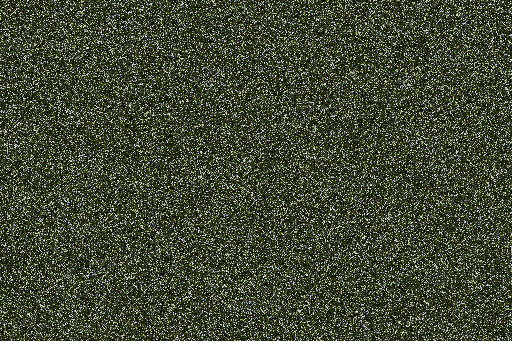

In [30]:
display(foto_new)

In [57]:
def pixelise(im, n):
    """Create a resampled image with pixels"""
    
    nx, ny = im.size
    imnew = im.resize((int(nx/n), int(ny/n))).resize((nx, ny))
    
    return imnew

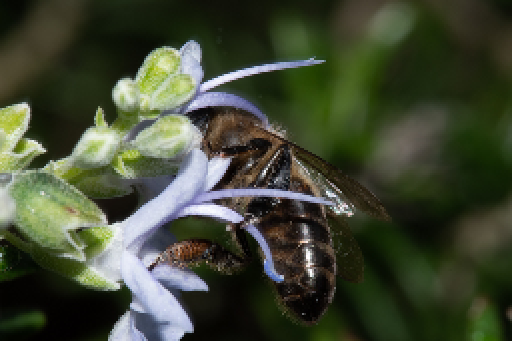

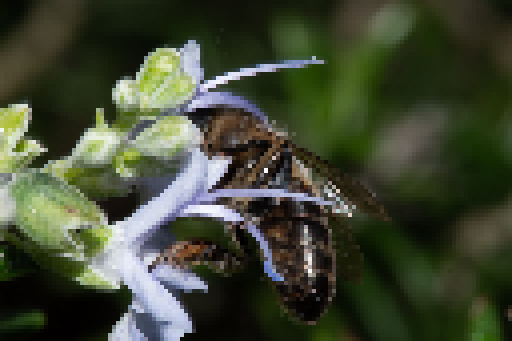

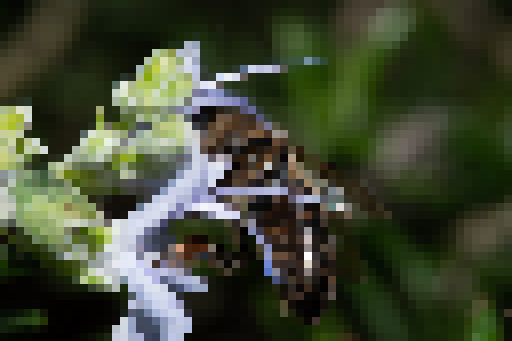

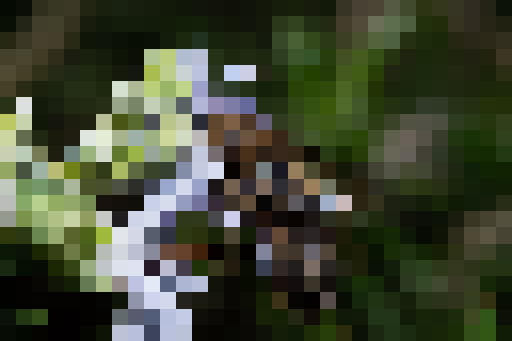

In [61]:
display(pixelise(foto, 2))
display(pixelise(foto, 4))
display(pixelise(foto, 8))
display(pixelise(foto, 16))

In [64]:
nx*ny/4**2, nx*ny/8**2, nx*ny/16**2

(10912.0, 2728.0, 682.0)

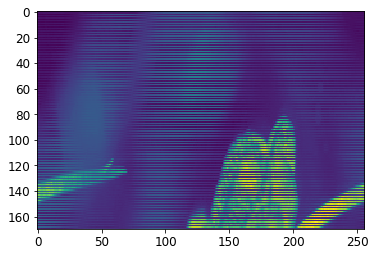

In [40]:
plt.imshow(im2)